데이터는 SQL에서 조회해 확인한 후 pymysql을 이용해 코드만 복사해 데이터프레임으로 변환 후 시각화 하는 방식을 사용

In [12]:
import pandas as pd
import numpy as np
import datetime as dt
import pymysql

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
palette = sns.color_palette("pastel")
# sns.palplot(palette)

In [16]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

# SQL DB연결&데이터프레임 변환 함수

In [18]:
def SQL_load(sql):
    # db접속
    db=pymysql.connect(host='localhost',port=3306,user='root',
                   passwd='661400',db='plt',charset='utf8',
                  cursorclass=pymysql.cursors.DictCursor)
    
    cs=db.cursor()
    
    cs.execute(sql)

    res=cs.fetchall()

    df=pd.DataFrame(res)
    
    db.close()
    return df

# 국가별 월별 총 매출

In [49]:
revenue='''select Country,date_format(InvoiceDate,'%m') Month,sum(quantity*unitprice) Total from plt.retail_on_top10 group by 1,2'''

In [50]:
month_t=SQL_load(revenue)
month_t

,Country,Month,Total
0,United Kingdom,01,442190.06
1,France,01,17740.12
2,Australia,01,9017.71
3,Germany,01,16910.84
4,Spain,01,10086.09
...,...,...,...
113,France,12,7276.92
114,Belgium,12,1417.73
115,Portugal,12,2808.19
116,Spain,12,316.21


대부분의 국가가 하반기로 갈수록 매출이 높아지는 것으로 보임

<AxesSubplot:xlabel='Month', ylabel='Total'>

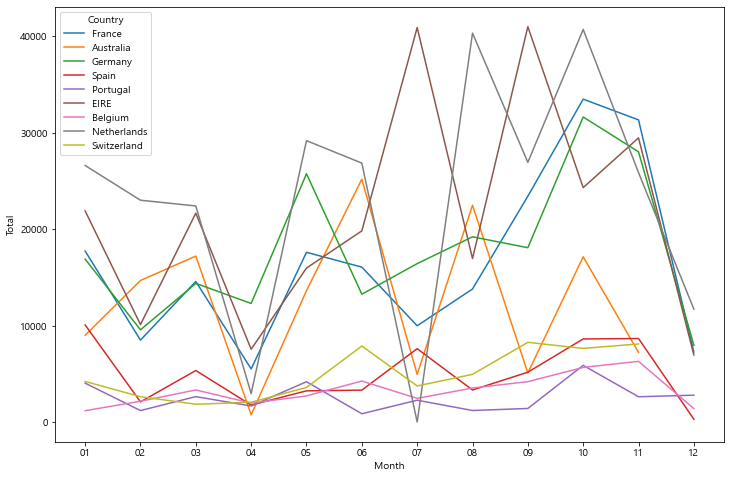

In [51]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Month',y='Total',data=month_t[month_t['Country']!='United Kingdom'],hue='Country')

영국은 데이터 수가 다른 국가에 비해 매우 많아 매출그래프를 그렸을 때 다른 국가의 추이를 보기 어려워 따로 그림.

In [52]:
pt=pd.pivot_table(month_t,index='Country',columns='Month',values='Total',aggfunc='sum')

In [53]:
pt[:9]

Month,01,02,03,04,05,06,07,08,09,10,11,12
Country,,,,,,,,,,,,
Australia,9017.71,14695.42,17223.99,771.60,13638.41,25187.77,4964.38,22489.20,5106.73,17150.53,7242.72,NaN
Belgium,1200.20,2181.07,3351.98,1989.48,2732.40,4274.82,2475.57,3554.02,4208.02,5685.38,6315.76,1417.73
EIRE,21904.19,10126.52,21674.36,7570.50,15982.19,19835.99,40905.15,16967.38,40995.49,24317.92,29473.41,6978.92
France,17740.12,8515.96,14589.55,5529.61,17614.88,16078.97,10000.19,13810.96,23428.04,33485.45,31337.09,7276.92
Germany,16910.84,9581.05,14392.69,12315.54,25751.20,13274.10,16440.98,19220.77,18091.22,31638.42,28025.02,7984.17
Netherlands,26611.16,23011.91,22416.49,2976.56,29185.88,26858.09,26.02,40327.81,26937.26,40708.65,25874.01,11728.02
Portugal,4055.71,1213.90,2660.85,1687.75,4202.23,884.46,2287.85,1221.40,1433.22,5899.46,2644.90,2808.19
Spain,10086.09,2114.50,5363.15,1785.65,3257.60,3333.21,7624.92,3346.91,5189.24,8636.94,8678.96,316.21
Switzerland,4231.23,2654.92,1870.23,2076.94,3610.01,7904.15,3762.65,4969.89,8284.86,7655.19,8118.96,NaN


대체로 네덜란드가 매출이 높음.

In [54]:
pt[:9].style.background_gradient(cmap = "PuBu").set_precision(2)

C:\Users\JungHun.DESKTOP-JRGUSS9\AppData\Local\Temp\ipykernel_10588\2901326011.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pt[:9].style.background_gradient(cmap = "PuBu").set_precision(2)


Month,01,02,03,04,05,06,07,08,09,10,11,12
Country,,,,,,,,,,,,
Australia,9017.71,14695.42,17223.99,771.60,13638.41,25187.77,4964.38,22489.20,5106.73,17150.53,7242.72,nan
Belgium,1200.20,2181.07,3351.98,1989.48,2732.40,4274.82,2475.57,3554.02,4208.02,5685.38,6315.76,1417.73
EIRE,21904.19,10126.52,21674.36,7570.50,15982.19,19835.99,40905.15,16967.38,40995.49,24317.92,29473.41,6978.92
France,17740.12,8515.96,14589.55,5529.61,17614.88,16078.97,10000.19,13810.96,23428.04,33485.45,31337.09,7276.92
Germany,16910.84,9581.05,14392.69,12315.54,25751.20,13274.10,16440.98,19220.77,18091.22,31638.42,28025.02,7984.17
Netherlands,26611.16,23011.91,22416.49,2976.56,29185.88,26858.09,26.02,40327.81,26937.26,40708.65,25874.01,11728.02
Portugal,4055.71,1213.90,2660.85,1687.75,4202.23,884.46,2287.85,1221.40,1433.22,5899.46,2644.90,2808.19
Spain,10086.09,2114.50,5363.15,1785.65,3257.60,3333.21,7624.92,3346.91,5189.24,8636.94,8678.96,316.21
Switzerland,4231.23,2654.92,1870.23,2076.94,3610.01,7904.15,3762.65,4969.89,8284.86,7655.19,8118.96,nan


## 상반기

In [193]:
h1=pt.iloc[:,:6].sum(axis=1)

## 하반기

In [194]:
h2=pt.iloc[:,6:].sum(axis=1)

## 1년

In [195]:
y=pt.sum(axis=1)

In [212]:
sales=pd.DataFrame({'H1':h1,
             'H2':h2,
             'Year':y})

In [272]:
sales['H1 percent']=sales['H1']/sales['Year']*100

In [273]:
sales['H2 percent']=sales['H2']/sales['Year']*100

In [274]:
sales

,H1,H2,Year,H1 percent,H2 percent
Country,,,,,
Australia,80534.900,56953.560,137488.460,58.575752,41.424248
Belgium,15729.950,23656.480,39386.430,39.937486,60.062514
EIRE,97093.750,159638.270,256732.020,37.819104,62.180896
France,80069.090,119338.650,199407.740,40.153451,59.846549
Germany,92225.420,121400.580,213626.000,43.171440,56.828560
Netherlands,131060.090,145601.770,276661.860,47.371940,52.628060
Portugal,14704.900,16295.020,30999.920,47.435284,52.564716
Spain,25940.200,33793.180,59733.380,43.426640,56.573360
Switzerland,22347.480,32791.550,55139.030,40.529331,59.470669


오스트레일리아만 1분기 매출이 더 적음

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

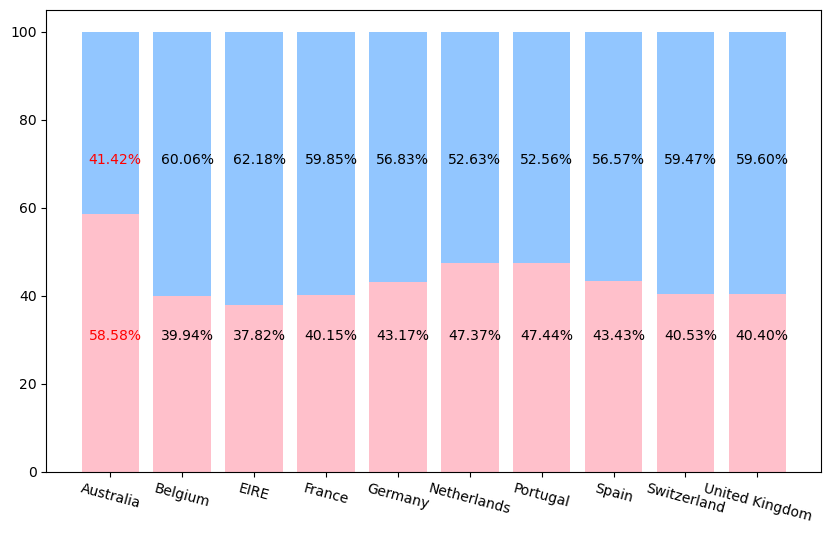

In [303]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(10,6))
plt.bar(sales.index,sales['H1 percent'],color='pink')
for i in range(len(sales)):
    if i<1:
        height=sales['H2 percent'][i]
        plt.text(i-0.3,70,'%.2f'%height+'%',size=10,color='red')
    else :
        height=sales['H2 percent'][i]
        plt.text(i-0.3,70,'%.2f'%height+'%',size=10)
plt.bar(sales.index,sales['H2 percent'],bottom=sales['H1 percent'])
for i in range(len(sales)):
    if i<1:
        height=sales['H1 percent'][i]
        plt.text(i-0.3,30,'%.2f'%height+'%',size=10,color='red')
    else :
        height2=sales['H1 percent'][i]
        plt.text(i-0.3,30,'%.2f'%height2+'%',size=10)
plt.xticks(rotation=-15)

# 국가별 최다 구매 및 최대 매출 상품

In [143]:
sql3='''select * from (select Country,Description,sum(Quantity) Q,
row_number() over(partition by country order by sum(Quantity) desc) RNK 
from plt.retail_on_top10 
group by 1,2)A where RNK<=5'''

In [144]:
top5_q=SQL_load(sql=sql3)

In [307]:
top5_q.sort_values('Q',ascending=False)

,Country,Description,Q,RNK
45,United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",80995,1
46,United Kingdom,MEDIUM CERAMIC TOP STORAGE JAR,76919,2
47,United Kingdom,WORLD WAR 2 GLIDERS ASSTD DESIGNS,44667,3
48,United Kingdom,JUMBO BAG RED RETROSPOT,40015,4
49,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,31156,5
25,Netherlands,RABBIT NIGHT LIGHT,4801,1
26,Netherlands,SPACEBOY LUNCH BOX,4400,2
27,Netherlands,DOLLY GIRL LUNCH BOX,4132,3
15,France,RABBIT NIGHT LIGHT,4000,1
28,Netherlands,PACK OF 72 RETROSPOT CAKE CASES,3888,4


## 최대 매출

In [56]:
sql4='''select * from (select Country,Description,sum(Quantity*unitprice) Total,
row_number() over(partition by country order by sum(Quantity*UnitPrice) desc) RNK 
from plt.retail_on_top10 
group by 1,2)A where RNK<=5'''

In [57]:
top5_t=SQL_load(sql=sql4)

In [70]:
top5_t.sort_values('Total',ascending=False).head()

,Country,Description,Total,RNK
45,United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",168469.60,1
46,United Kingdom,REGENCY CAKESTAND 3 TIER,94998.70,2
47,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,85582.00,3
48,United Kingdom,MEDIUM CERAMIC TOP STORAGE JAR,80291.44,4
49,United Kingdom,JUMBO BAG RED RETROSPOT,73927.87,5


## 최대 매출 5개 중 가장 많이 겹친 상품

In [81]:
df_pr=SQL_load('''select country,A.Description from plt.temp1 A,plt.product B 
where A.Description=B.Description order by CNT desc,2;
''')

In [82]:
df_pr

,Country,Description
0,Germany,REGENCY CAKESTAND 3 TIER
1,United Kingdom,REGENCY CAKESTAND 3 TIER
2,Australia,REGENCY CAKESTAND 3 TIER
3,Switzerland,REGENCY CAKESTAND 3 TIER
4,EIRE,REGENCY CAKESTAND 3 TIER
5,Spain,REGENCY CAKESTAND 3 TIER
6,France,REGENCY CAKESTAND 3 TIER
7,Belgium,POSTAGE
8,Switzerland,POSTAGE
9,Spain,POSTAGE


In [103]:
cnt_p=df_pr.groupby('Description').count().sort_values('Country',ascending=False).reset_index()

In [106]:
cnt_up=cnt_p[cnt_p['Country']!=1]

Text(0.5, 0, 'Product Count')

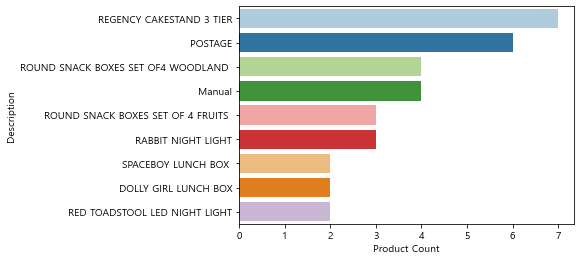

In [113]:
# palette = sns.color_palette("Paired")
sns.barplot(x='Country',y='Description',data=cnt_up,palette='Paired',orient='h')
plt.xlabel('Product Count')

# 국가별 월별 주문건수

In [143]:
order=SQL_load('''select *
from plt.month_rev;''')

In [144]:
order

,country,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
0,United Kingdom,18161,17759,24014,20866,25203,23714,23599,23105,35636,43735,58809,15801
1,France,660,419,545,226,723,573,448,569,1038,887,1496,324
2,Australia,127,89,108,18,117,169,159,107,102,114,43,0
3,Germany,778,296,577,440,764,653,755,795,773,1286,1095,317
4,Spain,382,96,201,96,105,181,180,252,242,306,304,65
5,Portugal,118,57,114,77,80,48,89,41,74,402,145,101
6,EIRE,173,346,531,306,525,539,616,593,1075,871,1010,319
7,Belgium,58,117,161,116,147,230,128,194,184,264,243,94
8,Netherlands,229,189,189,24,215,324,10,280,242,278,225,86
9,Switzerland,160,101,58,80,151,125,126,267,192,308,225,0


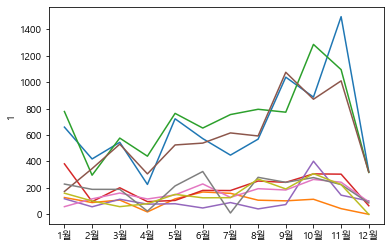

In [133]:
for i in range(1,len(order)):
    sns.lineplot(x=month,y=order.iloc[i,1:])

# 재구매 횟수

In [191]:
ret=SQL_load('''select country,M
		,count(distinct customerid) cust_cnt
		,count(distinct case when month_diff = 1 then customerid else null end) m1_cnt
		,count(distinct case when month_diff = 2 then customerid else null end) m2_cnt
        ,count(distinct case when month_diff = 3 then customerid else null end) m3_cnt
        ,count(distinct case when month_diff = 4 then customerid else null end) m4_cnt
        ,count(distinct case when month_diff = 5 then customerid else null end) m5_cnt
        ,count(distinct case when month_diff = 6 then customerid else null end) m6_cnt
        ,count(distinct case when month_diff = 7 then customerid else null end) m7_cnt
        ,count(distinct case when month_diff = 8 then customerid else null end) m8_cnt
        ,count(distinct case when month_diff = 9 then customerid else null end) m9_cnt
        ,count(distinct case when month_diff = 10 then customerid else null end) m10_cnt
from plt.m_diff group by 1,2''')

In [192]:
ret.index=ret.M

In [193]:
ret=ret[ret['country']=='United Kingdom']

In [195]:
ret.drop(['country','M'],axis=1,inplace=True)

In [198]:
ret.corr().style.background_gradient(cmap = "PuBu")

,cust_cnt,m1_cnt,m2_cnt,m3_cnt,m4_cnt,m5_cnt,m6_cnt,m7_cnt,m8_cnt,m9_cnt,m10_cnt
cust_cnt,1.000000,0.114263,-0.242053,-0.429576,-0.318409,-0.291163,-0.299174,-0.402648,-0.370152,-0.430784,-0.355908
m1_cnt,0.114263,1.000000,0.695909,0.262714,0.232304,0.205639,0.119674,0.059236,-0.090161,-0.150906,-0.167267
m2_cnt,-0.242053,0.695909,1.000000,0.688485,0.513213,0.408000,0.334272,0.155734,0.236343,0.043399,0.043533
m3_cnt,-0.429576,0.262714,0.688485,1.000000,0.871457,0.673853,0.407710,0.261618,0.243626,0.153287,0.112638
m4_cnt,-0.318409,0.232304,0.513213,0.871457,1.000000,0.893570,0.573513,0.300480,0.200468,0.134998,0.111944
m5_cnt,-0.291163,0.205639,0.408000,0.673853,0.893570,1.000000,0.753374,0.472435,0.333764,0.175969,0.156167
m6_cnt,-0.299174,0.119674,0.334272,0.407710,0.573513,0.753374,1.000000,0.805949,0.654390,0.214664,0.150017
m7_cnt,-0.402648,0.059236,0.155734,0.261618,0.300480,0.472435,0.805949,1.000000,0.725189,0.389484,0.196975
m8_cnt,-0.370152,-0.090161,0.236343,0.243626,0.200468,0.333764,0.654390,0.725189,1.000000,0.653588,0.535922
m9_cnt,-0.430784,-0.150906,0.043399,0.153287,0.134998,0.175969,0.214664,0.389484,0.653588,1.000000,0.912903


# 국가별 일평균 매출 그래프(x)

# X축 표시를 위한 월별 첫날 출력
1일에 구매가 없는 달도 존재하므로 월별 첫날을 기준으로 x축을 표시해야함.

In [10]:
month_sales['Day']=month_sales['Day'].astype('int')

In [11]:
first=pd.pivot_table(month_sales,index='Month',values='Day',aggfunc='min')
first

,Day
Month,
01,4
02,1
03,1
04,1
05,1
06,1
07,1
08,1
09,1


In [12]:
m=pd.date_range(start='20110101',periods=12,freq='M')
m

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31'],
              dtype='datetime64[ns]', freq='M')

In [13]:
month_x=[str(i).split(' ')[0][:7]+'-0'+str(j) for i,j in zip(pd.date_range(start='2011-01-01',periods=12,freq='MS'),first.Day)]
month_x

['2011-01-04',
 '2011-02-01',
 '2011-03-01',
 '2011-04-01',
 '2011-05-01',
 '2011-06-01',
 '2011-07-01',
 '2011-08-01',
 '2011-09-01',
 '2011-10-02',
 '2011-11-01',
 '2011-12-01']

In [14]:
labels=[str(i)+'월' for i in range(1,13)]

In [15]:
labels

['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

In [16]:
x=month_sales.DATE
x

0       2011-01-04
1       2011-01-05
2       2011-01-05
3       2011-01-06
4       2011-01-06
           ...    
1140    2011-12-08
1141    2011-12-09
1142    2011-12-09
1143    2011-12-09
1144    2011-12-09
Name: DATE, Length: 1145, dtype: object

In [17]:
sql2='''select A.country,A.Date,B.mx from plt.sales A, (select country,month,max(sales) mx from plt.sales group by 2) B
where A.sales=B.mx and A.month=B.month'''
cs.execute(sql2)

12

In [18]:
max_values=cs.fetchall()

In [19]:
mv=pd.DataFrame(max_values)
mv

,country,Date,mx
0,EIRE,2011-01-14,409.139512
1,Australia,2011-02-15,203.230725
2,EIRE,2011-03-11,1687.170000
3,France,2011-04-05,1136.300000
4,Netherlands,2011-05-25,1392.000000
5,Netherlands,2011-06-01,208.569231
6,Spain,2011-07-04,276.422667
7,Australia,2011-08-18,225.571546
8,Australia,2011-09-01,326.857778
9,Netherlands,2011-10-27,356.972143


([<matplotlib.axis.XTick at 0x15295707310>,
 [Text(0.0, 0, '1월'),
  Text(24.0, 0, '2월'),
  Text(48.0, 0, '3월'),
  Text(75.0, 0, '4월'),
  Text(96.0, 0, '5월'),
  Text(121.0, 0, '6월'),
  Text(147.0, 0, '7월'),
  Text(173.0, 0, '8월'),
  Text(199.0, 0, '9월'),
  Text(225.0, 0, '10월'),
  Text(251.0, 0, '11월'),
  Text(277.0, 0, '12월')])

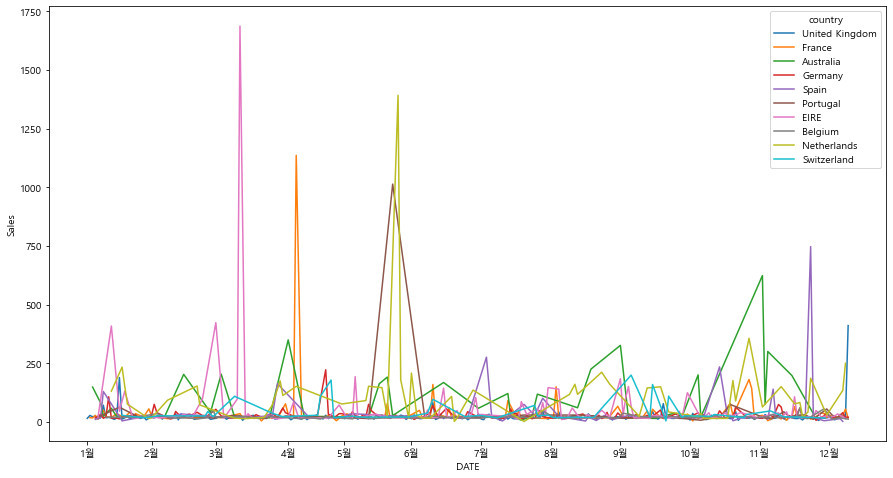

In [25]:
plt.figure(figsize=(15,8))
graph=sns.lineplot(x='DATE',y='Sales',hue='country',data=month_sales)
plt.xticks(month_x,labels=labels)
# for i in range(len(month_sales.DATE)):
#     height = month_sales['Sales'][i]
# #     values=month_sales['country'][i]
#     if height in mv['mx'].values:
# #         plt.text(x[i], height + 0.25,values,ha='center', va='bottom', size = 12)
# #         plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)

# 월별 일평균 최대 매출 국가 히트맵

In [105]:
max_sales=pd.pivot_table(month_sales,index='country',columns='Month',values='Sales',aggfunc='max')

In [108]:
max_sales.columns=labels

In [ ]:
max_sales.reset_index().index=max_sales.index

In [109]:
max_sales.index

Index(['Australia', 'Belgium', 'EIRE', 'France', 'Germany', 'Netherlands',
       'Portugal', 'Spain', 'Switzerland', 'United Kingdom'],
      dtype='object', name='country')

In [110]:
hm=max_sales.style.background_gradient(cmap = "PuBu")

In [111]:
hm

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
country,,,,,,,,,,,,
Australia,149.049583,203.230725,203.985854,350.000000,191.590000,168.538201,121.580870,225.571546,326.857778,200.875244,624.240000,nan
Belgium,21.005161,49.983333,23.804667,22.471667,21.859091,26.016000,48.085000,19.947436,37.781176,29.246863,61.199412,17.975400
EIRE,409.139512,98.680000,1687.170000,84.417931,193.459000,144.631613,146.670404,140.164516,184.788571,40.376250,107.767727,34.552941
France,56.124531,26.886842,77.688750,1136.300000,79.885714,160.000000,91.546000,150.277500,54.819592,181.267500,65.636667,55.300000
Germany,107.635714,75.600000,59.814286,222.750000,75.560559,69.711111,55.831429,41.343333,51.725952,64.145238,74.900000,39.989722
Netherlands,234.001212,153.609076,175.456731,152.280000,1392.000000,208.569231,2.602000,212.400000,150.175769,356.972143,186.641481,250.600000
Portugal,63.100556,22.643023,28.039107,22.926667,1013.893333,19.572400,29.844643,29.790244,21.588889,74.875000,56.000000,32.655909
Spain,130.408571,34.320000,163.500000,18.969565,34.840000,20.338462,276.422667,28.296667,28.008974,235.222667,747.500000,14.338333
Switzerland,28.608175,44.837500,109.820000,179.000000,25.407553,96.985625,71.333333,20.906429,200.000000,32.208095,47.386794,nan
